# 1. 实验室介绍

## 1.1 LightGBM的介绍

LightGBM是2017年由微软推出的可扩展机器学习系统，是微软旗下DMKT的一个开源项目，由2014年首届阿里巴巴大数据竞赛获胜者之一柯国霖老师带领开发。它是一款基于GBDT（梯度提升决策树）算法的分布式梯度提升框架，为了满足缩短模型计算时间的需求，LightGBM的设计思路主要集中在减小数据对内存与计算性能的使用，以及减少多机器并行计算时的通讯代价。

LightGBM可以看作是XGBoost的升级豪华版，在获得与XGBoost近似精度的同时，又提供了更快的训练速度与更少的内存消耗。正如其名字中的Light所蕴含的那样，LightGBM在大规模数据集上跑起来更加优雅轻盈，一经推出便成为各种数据竞赛中刷榜夺冠的神兵利器。



LightGBM的主要优点：

1. 简单易用。提供了主流的Python\C++\R语言接口，用户可以轻松使用LightGBM建模并获得相当不错的效果。
2. 高效可扩展。在处理大规模数据集时高效迅速、高准确度，对内存等硬件资源要求不高。
3. 鲁棒性强。相较于深度学习模型不需要精细调参便能取得近似的效果。
4. LightGBM直接支持缺失值与类别特征，无需对数据额外进行特殊处理

LightGBM的主要缺点：

1. 相对于深度学习模型无法对时空位置建模，不能很好地捕获图像、语音、文本等高维数据。
2. 在拥有海量训练数据，并能找到合适的深度学习模型时，深度学习的精度可以遥遥领先LightGBM。

## 1.2 LightGBM的应用

LightGBM在机器学习与数据挖掘领域有着极为广泛的应用。据统计LightGBM模型自2016到2019年在Kaggle平台上累积获得数据竞赛前三名三十余次，其中包括CIKM2017 AnalytiCup、IEEE Fraud Detection等知名竞赛。这些竞赛来源于各行各业的真实业务，这些竞赛成绩表明LightGBM具有很好的可扩展性，在各类不同问题上都可以取得非常好的效果。

同时，LightGBM还被成功应用在工业界与学术界的各种问题中。例如金融风控、购买行为识别、交通流量预测、环境声音分类、基因分类、生物成分分析等诸多领域。虽然领域相关的数据分析和特性工程在这些解决方案中也发挥了重要作用，但学习者与实践者对LightGBM的一致选择表明了这一软件包的影响力与重要性。

# 2. 实验室手册

## 2.1 学习目标

- 了解 LightGBM 的参数与相关知识
- 掌握 LightGBM 的Python调用并将其运用到英雄联盟游戏胜负预测数据集上

## 2.2 代码流程

Part1 基于英雄联盟数据集的LightGBM分类实践

- Step1: 库函数导入 
- Step2: 数据读取/载入 
- Step3: 数据信息简单查看 
- Step4: 可视化描述 
- Step5: 利用 LightGBM 进行训练与预测
- Step6: 利用 LightGBM 进行特征选择
- Step7: 通过调整参数获得更好的效果

## 2.3 算法实战

## 2.3.1 基于英雄联盟数据集的LightGBM分类实战

在实践的最开始，我们首先需要导入一些基础的函数库包括：numpy （Python进行科学计算的基础软件包），pandas（pandas是一种快速，强大，灵活且易于使用的开源数据分析和处理工具），matplotlib和seaborn绘图。

In [ ]:
#下载需要用到的数据集
!wget https://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/8LightGBM/high_diamond_ranked_10min.csv

**Step1：函数库导入**

In [1]:
##  基础函数库
import numpy as np 
import pandas as pd

## 绘图函数库
import matplotlib.pyplot as plt
import seaborn as sns

D:\Software\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


本次我们选择英雄联盟数据集进行LightGBM的场景体验。英雄联盟是2009年美国拳头游戏开发的MOBA竞技网游，在每局比赛中蓝队与红队在同一个地图进行作战，游戏的目标是破坏敌方队伍的防御塔，进而摧毁敌方的水晶枢纽，拿下比赛的胜利。

现在共有9881场英雄联盟韩服钻石段位以上的排位比赛数据，数据提供了在十分钟时的游戏状态，包括击杀数、死亡数、金币数量、经验值、等级……等信息。列blueWins是数据的标签，代表了本场比赛是否为蓝队获胜。

数据的各个特征描述如下：

| 特征名称                 | 特征意义         | 取值范围 |   |   |
|--------------------------|------------------|----------|---|---|
|     WardsPlaced          | 插眼数量         | 整数     |   |   |
| WardsDestroyed           | 拆眼数量         | 整数     |   |   |
| FirstBlood               | 是否获得首次击杀 | 整数     |   |   |
| Kills                    | 击杀英雄数量     | 整数     |   |   |
| Deaths                   | 死亡数量         | 整数     |   |   |
| Assists                  | 助攻数量         | 整数     |   |   |
| EliteMonsters            | 击杀大型野怪数量 | 整数     |   |   |
| Dragons                  | 击杀史诗野怪数量 | 整数     |   |   |
| Heralds                  | 击杀峡谷先锋数量 | 整数     |   |   |
| TowersDestroyed          | 推塔数量         | 整数     |   |   |
| TotalGold                | 总经济           | 整数     |   |   |
| AvgLevel                 | 平均英雄等级     | 浮点数   |   |   |
| TotalExperience          | 英雄总经验       | 整数     |   |   |
| TotalMinionsKilled       | 英雄补兵数量     | 整数     |   |   |
| TotalJungleMinionsKilled | 英雄击杀野怪数量 | 整数     |   |   |
| GoldDiff                 | 经济差距         | 整数     |   |   |
| ExperienceDiff           | 经验差距         | 整数     |   |   |
| CSPerMin                 | 分均补刀         | 浮点数   |   |   |
| GoldPerMin               | 分均经济         | 浮点数   |   |   |

**Step2：数据读取/载入**

In [2]:
## 我们利用Pandas自带的read_csv函数读取并转化为DataFrame格式

df = pd.read_csv('./high_diamond_ranked_10min.csv')
y = df.blueWins

**Step3：数据信息简单查看**

In [3]:
## 利用.info()查看数据的整体信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [4]:
## 进行简单的数据查看，我们可以利用 .head() 头部.tail()尾部
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [6]:
df.tail()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8
9878,4523772935,1,18,0,1,6,6,5,0,0,...,0,15339,6.8,17379,201,46,-927,58,20.1,1533.9


In [7]:
## 标注标签并利用value_counts函数查看训练集标签的数量
y = df.blueWins
y.value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

数据集正负标签数量基本相同，不存在数据不平衡的问题。

In [9]:
## 标注特征列
drop_cols = ['gameId','blueWins']
x = df.drop(drop_cols, axis=1)

In [10]:
## 对于特征进行一些统计描述
x.describe()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


- 我们发现不同对局中插眼数和拆眼数的取值范围存在明显差距，甚至有前十分钟插了250个眼的异常值。
- 我们发现EliteMonsters的取值相当于Deagons + Heralds。
- 我们发现TotalGold	等变量在大部分对局中差距不大。
- 我们发现两支队伍的经济差和经验差是相反数。
- 我们发现红队和蓝队拿到首次击杀的概率大概都是50%

In [11]:
## 根据上面的描述，我们可以去除一些重复变量，比如只要知道蓝队是否拿到一血，我们就知道红队有没有拿到，可以去除红队的相关冗余数据。
drop_cols = ['redFirstBlood','redKills','redDeaths'
             ,'redGoldDiff','redExperienceDiff', 'blueCSPerMin',
            'blueGoldPerMin','redCSPerMin','redGoldPerMin']
x.drop(drop_cols, axis=1, inplace=True)

**Step4:可视化描述**

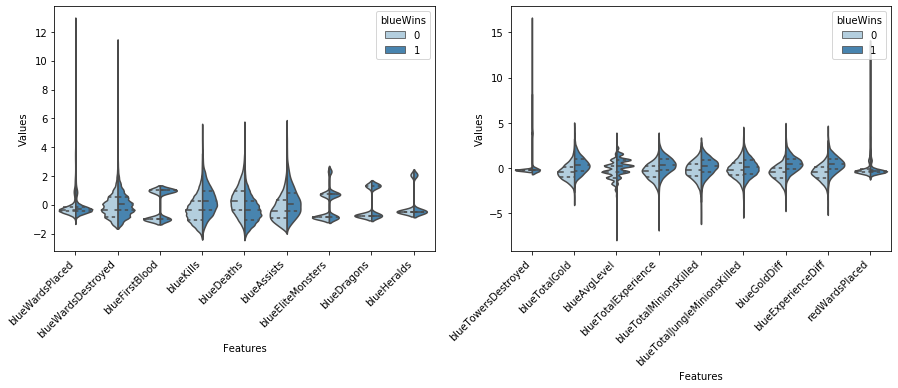

In [12]:
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 0:9]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

fig, ax = plt.subplots(1,2,figsize=(15,5))

# 绘制小提琴图
sns.violinplot(x='Features', y='Values', hue='blueWins', data=data, split=True,
               inner='quart', ax=ax[0], palette='Blues')
fig.autofmt_xdate(rotation=45)

data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 9:18]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

# 绘制小提琴图
sns.violinplot(x='Features', y='Values', hue='blueWins', 
               data=data, split=True, inner='quart', ax=ax[1], palette='Blues')
fig.autofmt_xdate(rotation=45)

plt.show()

小提琴图 (Violin Plot)是用来展示多组数据的分布状态以及概率密度。这种图表结合了箱形图和密度图的特征，主要用来显示数据的分布形状。

从图中我们可以看出：

- 击杀英雄数量越多更容易赢，死亡数量越多越容易输（bluekills与bluedeaths左右的区别）。
- 助攻数量与击杀英雄数量形成的图形状类似，说明他们对游戏结果的影响差不多。
- 一血的取得情况与获胜有正相关，但是相关性不如击杀英雄数量明显。
- 经济差与经验差对于游戏胜负的影响较小。
- 击杀野怪数量对游戏胜负的影响并不大。


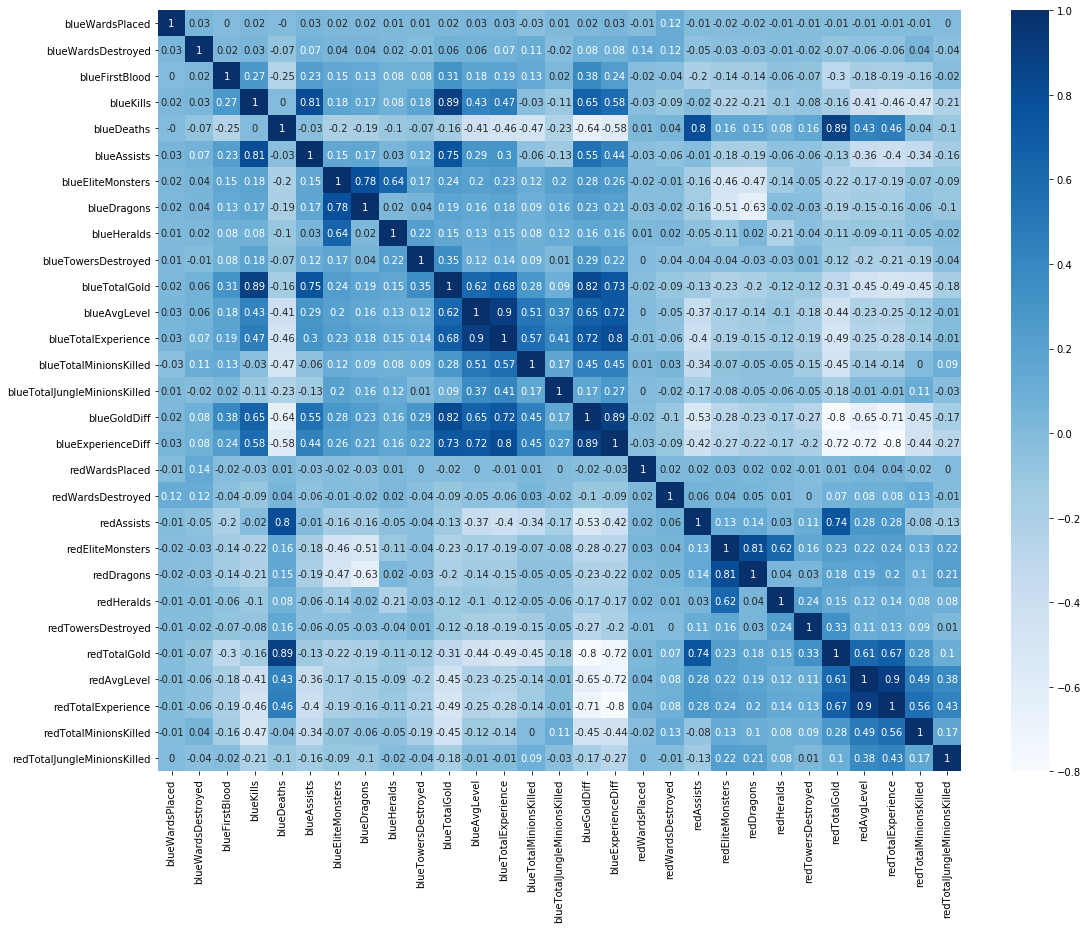

In [13]:
plt.figure(figsize=(18,14))
sns.heatmap(round(x.corr(),2), cmap='Blues', annot=True)
plt.show()

同时我们画出各个特征之间的相关性热力图，颜色越深代表特征之间相关性越强，我们剔除那些相关性较强的冗余特征。

In [14]:
# 去除冗余特征
drop_cols = ['redAvgLevel','blueAvgLevel']
x.drop(drop_cols, axis=1, inplace=True)

D:\Software\Anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
D:\Software\Anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


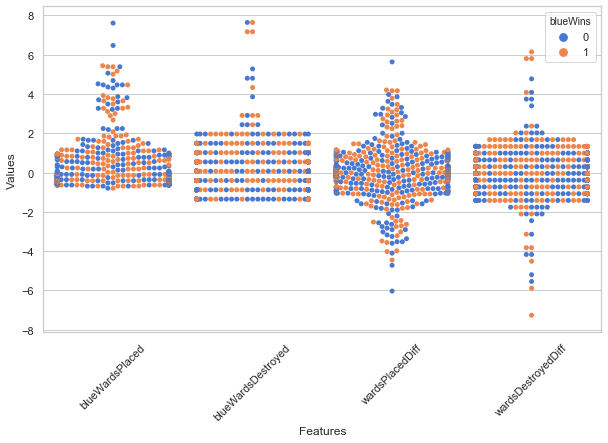

In [15]:
sns.set(style='whitegrid', palette='muted')

# 构造两个新特征
x['wardsPlacedDiff'] = x['blueWardsPlaced'] - x['redWardsPlaced']
x['wardsDestroyedDiff'] = x['blueWardsDestroyed'] - x['redWardsDestroyed']

data = x[['blueWardsPlaced','blueWardsDestroyed','wardsPlacedDiff','wardsDestroyedDiff']].sample(1000)
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

plt.figure(figsize=(10,6))
sns.swarmplot(x='Features', y='Values', hue='blueWins', data=data)
plt.xticks(rotation=45)
plt.show()

我们画出了插眼数量的散点图，发现不存在插眼数量与游戏胜负间的显著规律。猜测由于钻石分段以上在哪插眼在哪好排眼都是套路，所以数据中前十分钟插眼数拔眼数对游戏的影响不大。所以我们暂时先把这些特征去掉。

In [16]:
## 去除和眼位相关的特征
drop_cols = ['blueWardsPlaced','blueWardsDestroyed','wardsPlacedDiff',
            'wardsDestroyedDiff','redWardsPlaced','redWardsDestroyed']
x.drop(drop_cols, axis=1, inplace=True)

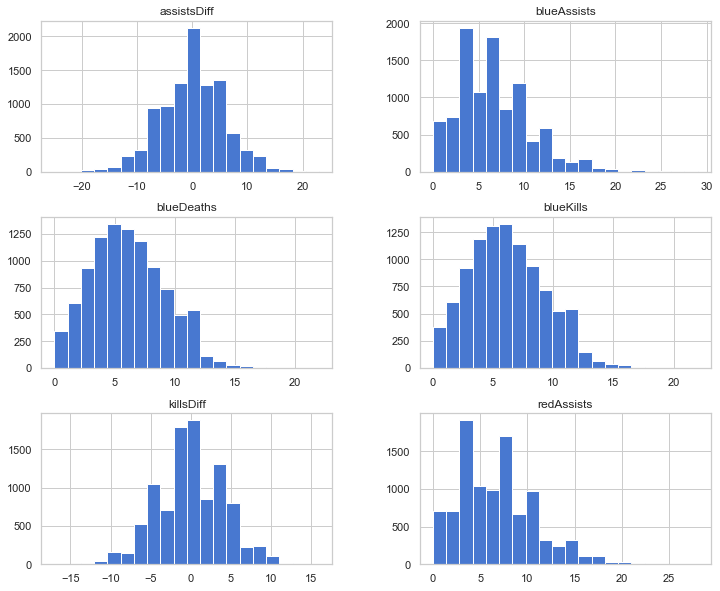

In [17]:
x['killsDiff'] = x['blueKills'] - x['blueDeaths']
x['assistsDiff'] = x['blueAssists'] - x['redAssists']

x[['blueKills','blueDeaths','blueAssists','killsDiff','assistsDiff','redAssists']].hist(figsize=(12,10), bins=20)
plt.show()

我们发现击杀、死亡与助攻数的数据分布差别不大。但是击杀减去死亡、助攻减去死亡的分布与原分布差别很大，因此我们新构造这么两个特征。

In [ ]:

data = x[['blueKills','blueDeaths','blueAssists','killsDiff','assistsDiff','redAssists']].sample(1000)
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

plt.figure(figsize=(10,6))
sns.swarmplot(x='Features', y='Values', hue='blueWins', data=data)
plt.xticks(rotation=45)
plt.show()

从上图我们可以发现击杀数与死亡数与助攻数，以及我们构造的特征对数据都有较好的分类能力。

In [ ]:
data = pd.concat([y, x], axis=1).sample(500)

sns.pairplot(data, vars=['blueKills','blueDeaths','blueAssists','killsDiff','assistsDiff','redAssists'], 
             hue='blueWins')

plt.show()

一些特征两两组合后对于数据的划分能力也有提升。

In [ ]:
x['dragonsDiff'] = x['blueDragons'] - x['redDragons']
x['heraldsDiff'] = x['blueHeralds'] - x['redHeralds']
x['eliteDiff'] = x['blueEliteMonsters'] - x['redEliteMonsters']

data = pd.concat([y, x], axis=1)

eliteGroup = data.groupby(['eliteDiff'])['blueWins'].mean()
dragonGroup = data.groupby(['dragonsDiff'])['blueWins'].mean()
heraldGroup = data.groupby(['heraldsDiff'])['blueWins'].mean()

fig, ax = plt.subplots(1,3, figsize=(15,4))

eliteGroup.plot(kind='bar', ax=ax[0])
dragonGroup.plot(kind='bar', ax=ax[1])
heraldGroup.plot(kind='bar', ax=ax[2])

print(eliteGroup)
print(dragonGroup)
print(heraldGroup)

plt.show()

我们构造了两队之间是否拿到龙、是否拿到峡谷先锋、击杀大型野怪的数量差值，发现在游戏的前期拿到龙比拿到峡谷先锋更容易获得胜利。拿到大型野怪的数量和胜率也存在着强相关。

In [ ]:
x['towerDiff'] = x['blueTowersDestroyed'] - x['redTowersDestroyed']

data = pd.concat([y, x], axis=1)

towerGroup = data.groupby(['towerDiff'])['blueWins']
print(towerGroup.count())
print(towerGroup.mean())

fig, ax = plt.subplots(1,2,figsize=(15,5))

towerGroup.mean().plot(kind='line', ax=ax[0])
ax[0].set_title('Proportion of Blue Wins')
ax[0].set_ylabel('Proportion')

towerGroup.count().plot(kind='line', ax=ax[1])
ax[1].set_title('Count of Towers Destroyed')
ax[1].set_ylabel('Count')

推塔是英雄联盟这个游戏的核心，因此推塔数量可能与游戏的胜负有很大关系。我们绘图发现，尽管前十分钟推掉第一座防御塔的概率很低，但是一旦某只队伍推掉第一座防御塔，获得游戏的胜率将大大增加。

**Step5：利用 LightGBM 进行训练与预测**

In [ ]:
## 为了正确评估模型性能，将数据划分为训练集和测试集，并在训练集上训练模型，在测试集上验证模型性能。
from sklearn.model_selection import train_test_split

## 选择其类别为0和1的样本 （不包括类别为2的样本）
data_target_part = y
data_features_part = x

## 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(data_features_part, data_target_part, test_size = 0.2, random_state = 2020)

In [2]:
## 导入LightGBM模型
from lightgbm.sklearn import LGBMClassifier
## 定义 LightGBM 模型 
clf = LGBMClassifier()
# 在训练集上训练LightGBM模型
clf.fit(x_train, y_train)

OSError: dlopen(/Users/wenxinxie/anaconda2/envs/python36/lib/python3.6/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/wenxinxie/anaconda2/envs/python36/lib/python3.6/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [ ]:
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)
from sklearn import metrics

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

我们可以发现共有718 + 707个样本预测正确，306 + 245个样本预测错误。

**Step7: 利用 LightGBM 进行特征选择**

LightGBM的特征选择属于特征选择中的嵌入式方法，在LightGBM中可以用属性feature_importances_去查看特征的重要度。

In [ ]:
sns.barplot(y=data_features_part.columns, x=clf.feature_importances_)

总经济差距等特征，助攻数量、击杀死亡数量等特征都具有很大的作用。插眼数、推塔数对模型的影响并不大。

初次之外，我们还可以使用LightGBM中的下列重要属性来评估特征的重要性。

- gain:当利用特征做划分的时候的评价基尼指数
- split:是以特征用到的次数来评价

In [ ]:
from sklearn.metrics import accuracy_score
from lightgbm import plot_importance

def estimate(model,data):

    #sns.barplot(data.columns,model.feature_importances_)
    ax1=plot_importance(model,importance_type="gain")
    ax1.set_title('gain')
    ax2=plot_importance(model, importance_type="split")
    ax2.set_title('split')
    plt.show()
def classes(data,label,test):
    model=LGBMClassifier()
    model.fit(data,label)
    ans=model.predict(test)
    estimate(model, data)
    return ans
 
ans=classes(x_train,y_train,x_test)
pre=accuracy_score(y_test, ans)
print('acc=',accuracy_score(y_test,ans))


这些图同样可以帮助我们更好的了解其他重要特征。

**Step8: 通过调整参数获得更好的效果**

LightGBM中包括但不限于下列对模型影响较大的参数：
1. learning_rate: 有时也叫作eta，系统默认值为0.3。每一步迭代的步长，很重要。太大了运行准确率不高，太小了运行速度慢。
2. num_leaves：系统默认为32。这个参数控制每棵树中最大叶子节点数量。
3. feature_fraction：系统默认值为1。我们一般设置成0.8左右。用来控制每棵随机采样的列数的占比(每一列是一个特征)。
4. max_depth： 系统默认值为6，我们常用3-10之间的数字。这个值为树的最大深度。这个值是用来控制过拟合的。max_depth越大，模型学习的更加具体。

调节模型参数的方法有贪心算法、网格调参、贝叶斯调参等。这里我们采用网格调参，它的基本思想是穷举搜索：在所有候选的参数选择中，通过循环遍历，尝试每一种可能性，表现最好的参数就是最终的结果

In [ ]:
## 从sklearn库中导入网格调参函数
from sklearn.model_selection import GridSearchCV

## 定义参数取值范围
learning_rate = [0.1, 0.3, 0.6]
feature_fraction = [0.5, 0.8, 1]
num_leaves = [16, 32, 64]
max_depth = [-1,3,5,8]

parameters = { 'learning_rate': learning_rate,
              'feature_fraction':feature_fraction,
              'num_leaves': num_leaves,
              'max_depth': max_depth}
model = LGBMClassifier(n_estimators = 50)

## 进行网格搜索
clf = GridSearchCV(model, parameters, cv=3, scoring='accuracy',verbose=3, n_jobs=-1)
clf = clf.fit(x_train, y_train)

In [ ]:
## 网格搜索后的最好参数为

clf.best_params_

In [ ]:
## 在训练集和测试集上分布利用最好的模型参数进行预测

## 定义带参数的 LightGBM模型 
clf = LGBMClassifier(feature_fraction = 0.8,
                    learning_rate = 0.1,
                    max_depth= 3,
                    num_leaves = 16)
# 在训练集上训练LightGBM模型
clf.fit(x_train, y_train)

train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

原本有306 + 245个错误，现在有 287 + 230个错误，带来了明显的正确率提升。

## 2.4 重要知识点

### 2.4.1 LightGBM的重要参数

#### 2.4.1.1 基本参数调整

1. **num_leaves参数** 这是控制树模型复杂度的主要参数，一般的我们会使num_leaves小于（2的max_depth次方），以防止过拟合。由于LightGBM是leaf-wise建树与XGBoost的depth-wise建树方法不同，num_leaves比depth有更大的作用。、

2. **min_data_in_leaf** 这是处理过拟合问题中一个非常重要的参数. 它的值取决于训练数据的样本个树和 num_leaves参数. 将其设置的较大可以避免生成一个过深的树, 但有可能导致欠拟合. 实际应用中, 对于大数据集, 设置其为几百或几千就足够了.

3. **max_depth** 树的深度，depth 的概念在 leaf-wise 树中并没有多大作用, 因为并不存在一个从 leaves 到 depth 的合理映射。

#### 2.4.1.2 针对训练速度的参数调整

1. 通过设置 bagging_fraction 和 bagging_freq 参数来使用 bagging 方法。
2. 通过设置 feature_fraction 参数来使用特征的子抽样。
3. 选择较小的 max_bin 参数。
4. 使用 save_binary 在未来的学习过程对数据加载进行加速。

#### 2.4.1.3 针对准确率的参数调整

1. 使用较大的 max_bin （学习速度可能变慢）
2. 使用较小的 learning_rate 和较大的 num_iterations
3. 使用较大的 num_leaves （可能导致过拟合）
4. 使用更大的训练数据
5. 尝试 dart 模式

#### 2.4.1.4 针对过拟合的参数调整

1. 使用较小的 max_bin
2. 使用较小的 num_leaves
3. 使用 min_data_in_leaf 和 min_sum_hessian_in_leaf
4. 通过设置 bagging_fraction 和 bagging_freq 来使用 bagging
5. 通过设置 feature_fraction 来使用特征子抽样
6. 使用更大的训练数据
7. 使用 lambda_l1, lambda_l2 和 min_gain_to_split 来使用正则
8. 尝试 max_depth 来避免生成过深的树


### 2.4.2 LightGBM原理粗略讲解

LightGBM底层实现了GBDT算法，并且添加了一系列的新特性：
1. 基于直方图算法进行优化，使数据存储更加方便、运算更快、鲁棒性强、模型更加稳定等。
2. 提出了带深度限制的 Leaf-wise 算法，抛弃了大多数GBDT工具使用的按层生长 (level-wise) 的决策树生长策略，而使用了带有深度限制的按叶子生长策略，可以降低误差，得到更好的精度。
3. 提出了单边梯度采样算法，排除大部分小梯度的样本，仅用剩下的样本计算信息增益，它是一种在减少数据量和保证精度上平衡的算法。
4. 提出了互斥特征捆绑算法，高维度的数据往往是稀疏的，这种稀疏性启发我们设计一种无损的方法来减少特征的维度。通常被捆绑的特征都是互斥的（即特征不会同时为非零值，像one-hot），这样两个特征捆绑起来就不会丢失信息。

LightGBM是基于CART树的集成模型，它的思想是串联多个决策树模型共同进行决策。

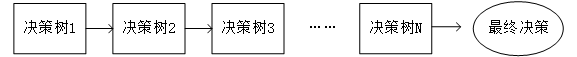

那么如何串联呢？LightGBM采用迭代预测误差的方法串联。举个通俗的例子，我们现在需要预测一辆车价值3000元。我们构建决策树1训练后预测为2600元，我们发现有400元的误差，那么决策树2的训练目标为400元，但决策树2的预测结果为350元，还存在50元的误差就交给第三棵树……以此类推，每一颗树用来估计之前所有树的误差，最后所有树预测结果的求和就是最终预测结果！

LightGBM的基模型是CART回归树，它有两个特点：（1）CART树，是一颗二叉树。（2）回归树，最后拟合结果是连续值。

LightGBM模型可以表示为以下形式，我们约定$f_t(x)$表示前$t$颗树的和，$h_t(x)$表示第$t$颗决策树，模型定义如下：

$f_{t}(x)=\sum_{t=1}^{T} h_{t}(x)$

由于模型递归生成，第$t$步的模型由第$t-1$步的模型形成，可以写成：

$f_{t}(x)=f_{t-1}(x)+h_{t}(x)$

每次需要加上的树$h_t(x)$是之前树求和的误差：

$r_{t, i}=y_{i}-f_{m-1}\left(x_{i}\right)$

我们每一步只要拟合一颗输出为$r_{t,i}$的CART树加到$f_{t-1}(x)$就可以了。